In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from PlateData import *

In [2]:
directory =  "/Users/sam/Dropbox (Harvard University)/Data/Mn_reporter_assay/"
filename = "SB_032322.xlsx"

RFU = read_Mn_assay_excel(filename, header_length=36, nrows = (144-38, 51-38, 132-38), directory=directory)
OD600 = read_Mn_assay_excel(filename, header_length=161, nrows = (144-38, 51-38, 132-38), directory=directory)

row_annotations = {'[MnCl2]': [np.nan, 1000, 100, 0, 1000, 100, 0, np.nan],
                   'use_row': [False, True, True, True, True, True, True, False],
                   'rep': [-1, 0, 0, 0, 1, 1, 1, -1]}
col_annotations = {'reporter': ['NaN', 'NaN', 'NaN'] + ['pSB1-EV', 'pSB1em2', 'pSB1em2', 'pSB1em2']*2 + ['NaN'],
                   'construct': ['NaN', 'NaN', 'NaN'] + ['EV', 'EV', 'DraNramp WT', 'DraNramp D56A']*2 + ['NaN'],
                   'sample': [0,0,0,1,2,3,4,1,2,3,4,-1],
                   'stock': [-1, -1, -1, 0, 0, 0, 0, 1, 1, 1, 1, -1],
                   'use_col': [False, False, False, True, True, True, True, True, True, True, True, False],}

Exp = PlateAssay((OD600, RFU), df_keys=("OD", "RFU"), 
                 row_annotations=row_annotations, col_annotations=col_annotations)

In [9]:
Exp_after = Exp[117:]

Text(0, 0.5, '[$MnCl_2$] (µM)')

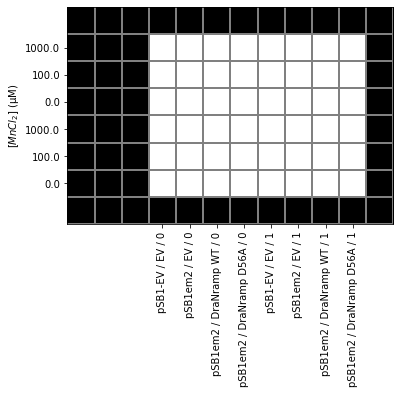

In [10]:
Exp.draw(row_annotations="[MnCl2]", col_annotations=("reporter", "construct", "stock"))
plt.ylabel("[$MnCl_2$] (µM)")

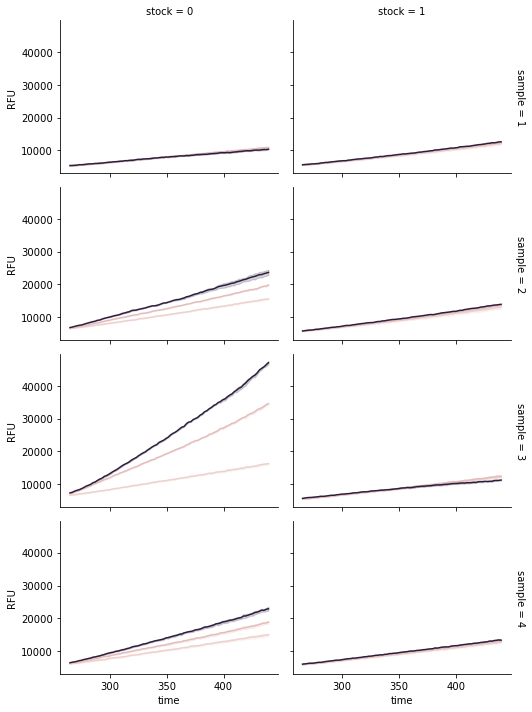

In [12]:
Exp_after = Exp[125:]
Exp_after.grid("RFU", "[MnCl2]", "stock", "sample")

In [16]:
Exp_after.select

,time,row,col,[MnCl2],use_row,reporter,construct,sample,use_col,rep,stock,OD,RFU
28,1.45,2,4,100.0,True,pSB1em2,EV,2,True,0,0,0.056,3659.0
32,1.45,2,8,100.0,True,pSB1em2,EV,2,True,0,1,0.059,3626.0
40,1.45,3,4,0.0,True,pSB1em2,EV,2,True,0,0,0.056,3701.0
44,1.45,3,8,0.0,True,pSB1em2,EV,2,True,0,1,0.063,3591.0
124,3.45,2,4,100.0,True,pSB1em2,EV,2,True,0,0,0.059,3644.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20300,437.35,3,8,0.0,True,pSB1em2,EV,2,True,0,1,0.829,13489.0
20380,439.35,2,4,100.0,True,pSB1em2,EV,2,True,0,0,0.733,20002.0
20384,439.35,2,8,100.0,True,pSB1em2,EV,2,True,0,1,0.768,13893.0
20392,439.35,3,4,0.0,True,pSB1em2,EV,2,True,0,0,0.706,15786.0


In [28]:
log_MnCl_conc = np.log10(data["[MnCl2]"].replace(0, 0.1))

In [25]:
np.unique(Exp.df["[MnCl2]"])

array([   0.,  100., 1000., ...,   nan,   nan,   nan])

In [30]:
np.unique(log_MnCl_conc)

array([-1.,  2.])

<AxesSubplot:xlabel='time', ylabel='RFU'>

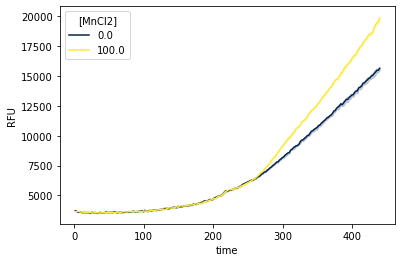

In [39]:
data = Exp.select({"[MnCl2]":[0,100], "sample":2, "stock":0})
sns.lineplot(data=data, x="time", y="RFU", hue="[MnCl2]", palette="cividis")

<AxesSubplot:xlabel='time', ylabel='OD'>

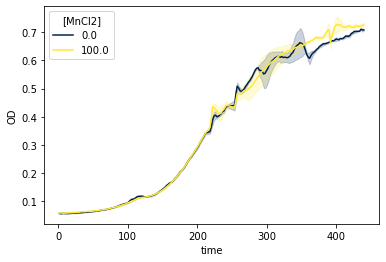

In [40]:
data = Exp.select({"[MnCl2]":[0,100], "sample":2, "stock":0})
sns.lineplot(data=data, x="time", y="OD", hue="[MnCl2]", palette="cividis")

In [74]:
def logistic_growth(x, L, k, x0, offset):
    
    return L/(1+np.exp(-k*(x-x0))) + offset

In [75]:
from scipy.optimize import curve_fit

L, k, x0, offset = curve_fit(logistic_growth, data["time"], data["OD"], p0=(0.7, 1, 250, 0.05))[0]

/Users/sam/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


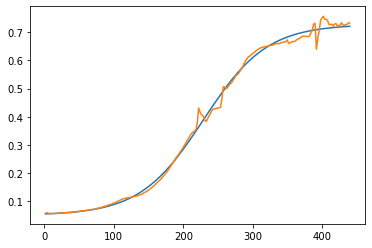

In [78]:
plt.plot(data["time"], logistic_growth(data["time"], L, k, x0, offset))
plt.plot(data["time"], data["OD"])

In [43]:
data = Exp.select({"[MnCl2]":100, "sample":2, "rep":0, "stock":0})

In [83]:
_, b_edges = np.histogram(data["OD"], bins=100)
# d = np.digitize(data["OD"], b_edges)
# x = []
# for i in np.unique(d):
#     x.append(np.mean(data["RFU"][d==i]))
# x = np.array(x + [x[-1]])

# x[np.digitize(data["OD"], b_edges)]

# data["RFU_normed"] = data["RFU"] / x[np.digitize(data["OD"], b_edges)]

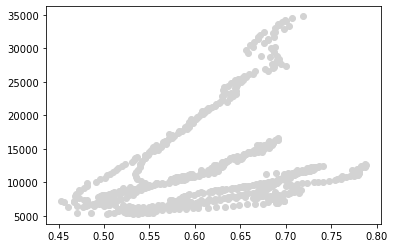

In [18]:
baseline_data = Exp.select({"sample":3, "use_col":True, "use_row":True, "[MnCl2]":(0,100),
                            "time": lambda t: t > Exp.times[119]})

plt.scatter(baseline_data["OD"], baseline_data["RFU"], c='lightgray')

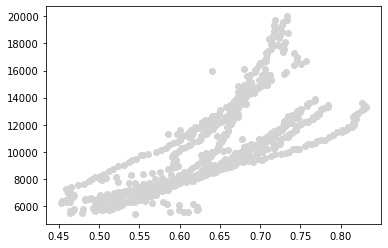

In [16]:
baseline_data = Exp.select({"sample":2, "use_col":True, "use_row":True, "[MnCl2]":(0,100),
                            "time": lambda t: t > Exp.times[119]})

plt.scatter(baseline_data["OD"], baseline_data["RFU"], c='lightgray')

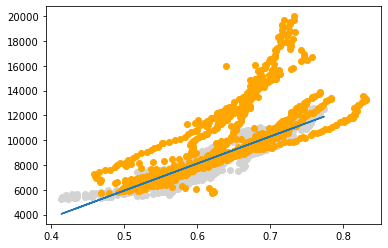

In [14]:
baseline_data = Exp_after.select({"sample":1, "use_col":True, "use_row":True, "[MnCl2]":(0,100)})

plt.scatter(baseline_data["OD"], baseline_data["RFU"], c='lightgray')
b,c = np.polyfit(baseline_data["OD"], baseline_data["RFU"], 1)

exp_data = Exp_after.select({"sample":2, "use_col":True, "use_row":True, "[MnCl2]":(0,100)})

plt.scatter(exp_data["OD"], exp_data["RFU"], c='orange')

x = baseline_data["OD"]

plt.plot(x, b*x + c)

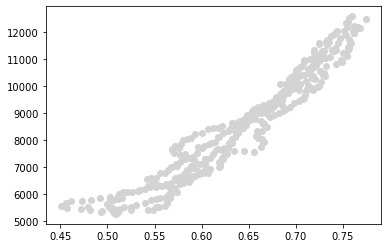

In [13]:
plt.scatter(baseline_data["OD"], baseline_data["RFU"], c='lightgray')

In [128]:
_, b_edges = np.histogram(baseline_data["OD"], 52)
d = np.digitize(baseline_data["OD"], b_edges)

In [139]:
x = []
for i in np.unique(d):
    x.append(np.mean(baseline_data["RFU"][d==i]))
x = np.array(x + [x[-1]])

x[np.digitize(baseline_data["OD"], b_edges)]

array([ 3441.8125    ,  3441.8125    ,  3441.8125    , ...,
       12483.        ,  9483.47058824, 11678.55      ])

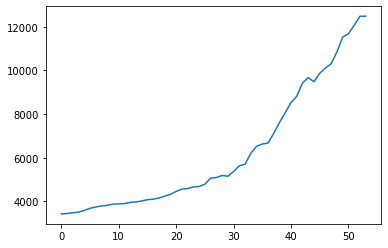

In [130]:
plt.plot(x)

In [140]:
for i in range(5):
    x = (x[:-2] + x[1:-1] + x[2:])/3

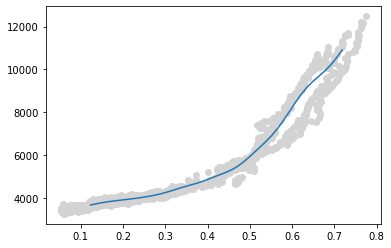

In [147]:
plt.scatter(baseline_data1["OD"], baseline_data1["RFU"], c='lightgray')
plt.plot(b_edges[5:-4], x)

In [3]:
Exp.times[144+51]

405.35

In [6]:
a = {"x":lambda i:i>3}

In [13]:
type(a["x"]) == 

True

function